<a href="https://colab.research.google.com/github/Gibsdevops/machine-learning-with-deep-learning-/blob/main/cats_dogs_color_images_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building an image classifier using cays and dogs dataset


In [1]:
import tensorflow as tf

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np


In [6]:
#data loading

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filterted_extracted
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filterted_extracted/cats_and_dogs_filtered/validation/dogs


In [8]:
base_dir = os.path.join(zip_dir, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') #directory with training images for cats
train_dogs_dir = os.path.join(train_dir, 'dogs') #directory with training images fr dogs
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [9]:
#understanding our data
#seeing how many images we have for both dogs and cats

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))


num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))


#getting the total on both
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [10]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [12]:
#setting the model parameters\
batch_size = 100 #the number of training examples to process before updating the model variable
image_shape = 150 #our training data consists of images with the width of 150 pixels


Images must be formatted into appropriately pre-processed floating point tensors before being fed into the network. The steps involved in preparing these images are:

Read images from the disk
Decode contents of these images and convert it into proper grid format as per their RGB content
Convert them into floating point tensors
Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.
Fortunately, all these tasks can be done using the class tf.keras.preprocessing.image.ImageDataGenerator.


In [13]:
#data preparation

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [15]:
#use the flow_from directory to load the images from the disk

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(image_shape, image_shape),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [16]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(image_shape, image_shape),
                                                           class_mode='binary')

Found 1000 images belonging to 2 classes.


In [17]:
#visaulizing training images

#getting a batch from our training generator

sample_training_images, _ = next(train_data_gen)

In [20]:
#function to plot the images in the form of a grid with 1 row and 5 columns
def plotimages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)

  plt.tight_layout()
  plt.show()

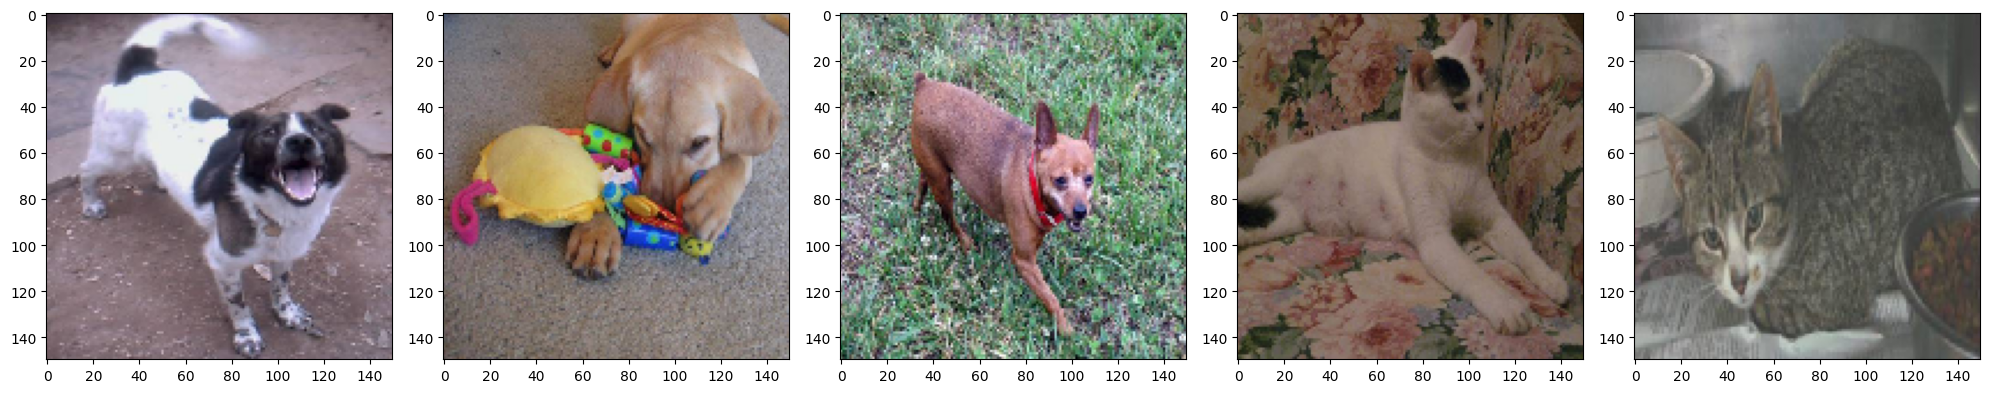

In [23]:
plotimages(sample_training_images[:5])

model creation

In [25]:
#defining the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)

])

In [26]:
#compile the model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [27]:
#looking at lal layers of the model using model.summary()

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model
epochs = 10

history = model.fit(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train / float(batch_size))),
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(batch_size)))
)

In [ ]:
#visaulizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


In [ ]:
epoch_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='training accuracy')
plt.plot(epoch_range, val_acc, label='validation_accuracy')
plt.legend(loc='lower right')
plt.title('training accuracy vs validation accuracy')

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()